# Task 1.

Develop the K-Nearest Neighbors (KNN) algorithm from scratch using Python, without
relying on any libraries.

In [1]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
#     Function will take two set of values as parameter and calculate eculidean distance 
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
#     Function will take two set of values as parameter and calculate manhattan distance
    def manhattan_distance(self, a, b):
        return sum(abs(val1-val2) for val1, val2 in zip(a,b))
            
#         Return the Count of each value present in list
    def counter(self, lst):
        count = {}
        for item in lst:
            if item in count:
                count[item] += 1
            else:
                count[item] = 1
        return count

#     return the most_common value (or the result by processing different neigbors)
    def most_common(self, d, n=None):
        items = [(v, k) for k, v in d.items()]
        items.sort(reverse=True)
        if n is None:
            n = len(items)
        return [(k, v) for v, k in items[:n]]

    

    def predict(self, X, distance_type='euc'):
        y_pred = []
        for x in X:
            if (distance_type == 'euc'):
                distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            elif (distance_type == 'man'):
                distances = [self.manhattan_distance(x, x_train) for x_train in self.X_train]
            # argsort (return sorted indices)
            # k_neighbors stores neighbors in ascending order
            k_indices = np.argsort(distances)[:self.k]
            k_neighbors = [self.y_train[i] for i in k_indices]
            counts = self.counter(k_neighbors)
            most_com = self.most_common(counts, 1)
            y_pred.append(most_com[0][0])
        return y_pred

# test cases
knn = KNN(k=3)
X_train = np.array([[7,7], [7,4], [3, 4], [1, 4]])
y_train = np.array([0,0,1,1])
knn.fit(X_train, y_train)

X_test = np.array([[3, 7], [1, 1]])
y_test = np.array([1, 1])
y_pred = knn.predict(X_test, 'man')

print("Accuracy: ", np.mean(y_pred == y_test))

Accuracy:  1.0


# Task 2. Utilizing the fruit_data_with_colors.csv dataset, perform the following steps:

# a. Read and load the data into the program.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("fruit_data_with_colors _1_.csv")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


# b. Prepare the data by eliminating any features that contain text or categorical values

In [3]:
df.drop(['fruit_label', 'fruit_subtype'], axis=1, inplace=True)
df

,fruit_name,mass,width,height,color_score
0,apple,192.0,8.4,7.3,0.55
1,apple,180.0,8.0,6.8,0.59
2,apple,176.0,7.4,7.2,0.60
3,mandarin,86.0,6.2,4.7,0.80
4,mandarin,84.0,6.0,4.6,0.79
5,mandarin,80.0,5.8,4.3,0.77
6,mandarin,80.0,5.9,4.3,0.81
7,mandarin,76.0,5.8,4.0,0.81
8,apple,178.0,7.1,7.8,0.92
9,apple,172.0,7.4,7.0,0.89


# You can use mean value to replace the missing values in case the data distribution is symmetric.

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Function to check Data distribution is symmetric
# checking those columns which have Nan in it
def is_symmetric(data):
    s = skew(data)
    if abs(s) < 0.5:
        print("The data is symmetrically distributed")
    else:
        print("The data is not symmetrically distributed")

is_symmetric(df['height'].to_numpy())
is_symmetric(df['mass'].to_numpy())


The data is not symmetrically distributed
The data is not symmetrically distributed


# For Both the columns that have NAN(missing values) is not symmetric so no need to replace with mean values.

# d. Divide the data into training and testing sets, with the first 50 rows being used for training and the remaining 10 rows being used for testing.

In [5]:
from sklearn.model_selection import train_test_split
df.replace(np.nan,0)
X = df[['mass','width','height','color_score']]
Y = df['fruit_name']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [6]:
X_train.head()

,mass,width,height,color_score
30,160.0,7.0,7.4,0.81
41,30000.0,7.1,7.5,0.78
33,164.0,7.2,7.0,0.80
43,154.0,7.2,7.2,0.82
49,174.0,7.3,10.1,0.72


In [7]:
X_test.head()

,mass,width,height,color_score
26,356.0,9.2,9.2,0.75
35,142.0,7.6,7.8,0.75
59,118.0,6.1,8.1,0.70
28,204.0,7.5,9.2,0.77
11,172.0,7.1,7.6,0.92


In [8]:
y_train.head()

30    orange
41    orange
33    orange
43    orange
49     lemon
Name: fruit_name, dtype: object

In [9]:
y_test.head()

26    orange
35    orange
59     lemon
28    orange
11     apple
Name: fruit_name, dtype: object

In [10]:
X_train.shape

(48, 4)

In [11]:
X_test.shape

(12, 4)

In [12]:
y_test.shape

(12,)

In [13]:
y_train.shape

(48,)

# Apply the KNN model for different values of K (ranging from 1 to 10) and examine the results.

In [14]:
kvalues_list = list(range(1, 11))
accuracy_scores = list(range(1, 11))
X_train = np.array(X_train.values.tolist())
y_train = np.array(y_train.values.tolist())
X_test = np.array(X_test.values.tolist())
y_test = np.array(y_test.values.tolist())
    
for i in kvalues_list:
    knntest_fruit_classifier = KNN(k = i)

    knntest_fruit_classifier.fit(X_train, y_train)    
    y_pred = knntest_fruit_classifier.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print("For K = ", i , " Accuracy is = ", accuracy)
    accuracy_scores[i - 1] = accuracy

For K =  1  Accuracy is =  0.5833333333333334
For K =  2  Accuracy is =  0.5
For K =  3  Accuracy is =  0.6666666666666666
For K =  4  Accuracy is =  0.6666666666666666
For K =  5  Accuracy is =  0.5
For K =  6  Accuracy is =  0.5833333333333334
For K =  7  Accuracy is =  0.5833333333333334
For K =  8  Accuracy is =  0.5833333333333334
For K =  9  Accuracy is =  0.4166666666666667
For K =  10  Accuracy is =  0.3333333333333333


# f. Plot the accuracy score for each value of K, to visualize the differences.

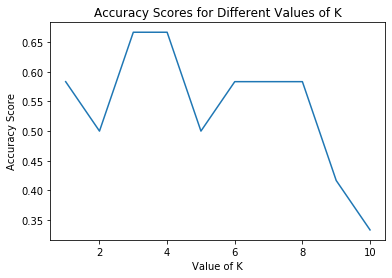

In [15]:

plt.plot(kvalues_list, accuracy_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Values of K')
plt.show()

# Bar Graph

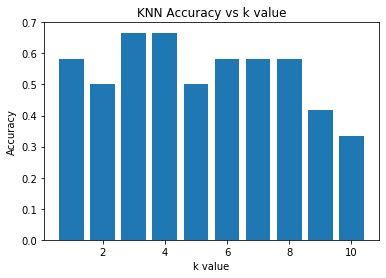

In [16]:
import matplotlib.pyplot as plt

plt.bar(kvalues_list, accuracy_scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k value')
plt.show()

# Using Manhattan Distance

In [17]:
for i in kvalues_list:
    knntest_fruit_classifier_manhattan_distance = KNN(k = i)

    knntest_fruit_classifier_manhattan_distance.fit(X_train, y_train)    
    y_pred = knntest_fruit_classifier_manhattan_distance.predict(X_test, 'man')
    accuracy = np.mean(y_pred == y_test)
    print("For K = ", i , " Accuracy is = ", accuracy)
    accuracy_scores[i - 1] = accuracy

For K =  1  Accuracy is =  0.5833333333333334
For K =  2  Accuracy is =  0.5833333333333334
For K =  3  Accuracy is =  0.6666666666666666
For K =  4  Accuracy is =  0.6666666666666666
For K =  5  Accuracy is =  0.5
For K =  6  Accuracy is =  0.5833333333333334
For K =  7  Accuracy is =  0.5833333333333334
For K =  8  Accuracy is =  0.5833333333333334
For K =  9  Accuracy is =  0.4166666666666667
For K =  10  Accuracy is =  0.3333333333333333


# f. Plot the accuracy score for each value of K, to visualize the differences.

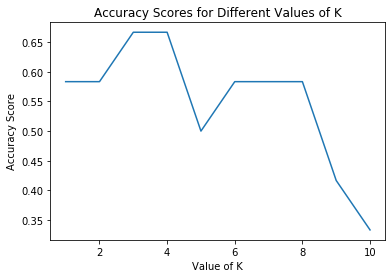

In [18]:

plt.plot(kvalues_list, accuracy_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Values of K')
plt.show()

# Bar Graph to visualize the differences of Manhattan Distance

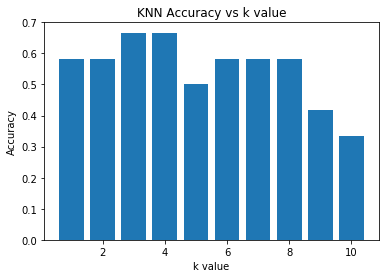

In [19]:
import matplotlib.pyplot as plt

plt.bar(kvalues_list, accuracy_scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k value')
plt.show()